# Introduction to Pandas

## Introduction
* Pandas is a newer package built on top of NumPy
* Pandas provides an efficient implementation of a DataFrame
* DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. 
* Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs
* documentation: http://pandas.pydata.org/pandas-docs/stable/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib notebook

In [2]:
data = pd.DataFrame(np.random.randn(50, 5))

data.to_csv('data/test_csv.csv', sep=';', index_label=['a', 'b', 'c', 'd', 'e', 'f'], decimal=',')
data.to_excel('data/test_excel.xlsx')

## Read csv-data

http://pandas.pydata.org/pandas-docs/stable/io.html#

In [3]:
data_csv = pd.read_csv('data/test_csv.csv')
data_csv.head()

,,,,,a;b;c;d;e;f;0;1;2;3;4
0;-0,6661474153620639;0,6989990963463661;-0,06412475873143907;1,016368669793426;-1,5505213664120732
1;-0,43880209849179097;-0,15009195899988606;1,12289187453203;1,1359714388465005;0,1923052148586617
2;-0,5263584223066645;-0,4202002310517768;-0,6604662492847414;-1,5243862315481864;-0,4499690525217674
3;0,828888237383689;-0,24851944703752302;-0,4987618003196574;-0,45176568798165995;-1,8076604984989848
4;-0,7373159444258398;-1,7131243540262675;-0,30671583042851097;-0,3526162314409081;0,4870512509480229


In [4]:
# sometimes you have to give some more details to read the csv correctly

data_csv = pd.read_csv('data/test_csv.csv', sep=';', decimal=',', usecols=(0, 1, 2, 3, 4))
data_csv.head()

,a,b,c,d,e
0,0,-0.666147,0.698999,-0.064125,1.016369
1,1,-0.438802,-0.150092,1.122892,1.135971
2,2,-0.526358,-0.420200,-0.660466,-1.524386
3,3,0.828888,-0.248519,-0.498762,-0.451766
4,4,-0.737316,-1.713124,-0.306716,-0.352616


## Basic Operations on Data Frames

In [5]:
# shape of the data frame

data_csv.shape

(50, 5)

In [6]:
# filter rows of the data frame

data_csv = data_csv.query('a < 0.8 | c > 0')
data_csv.head()

,a,b,c,d,e
0,0,-0.666147,0.698999,-0.064125,1.016369
5,5,-0.709582,0.727610,0.891011,-3.348663
15,15,-1.769758,0.031685,-1.248855,1.280066
16,16,0.129968,0.641664,-0.765376,0.421796
17,17,-0.633659,0.533216,0.443103,-0.636473


In [7]:
# filter columns of the data frame

data_csv = data_csv.filter(items=['a', 'b', 'c'])
print(data_csv.shape)
data_csv.head()

(23, 3)


,a,b,c
0,0,-0.666147,0.698999
5,5,-0.709582,0.727610
15,15,-1.769758,0.031685
16,16,0.129968,0.641664
17,17,-0.633659,0.533216


In [8]:
# sort the data frame

data_csv = data_csv.sort_values(by=['c'])
data_csv.head()

,a,b,c
28,28,1.814534,0.022567
15,15,-1.769758,0.031685
32,32,-0.832737,0.078816
31,31,-1.533798,0.089933
22,22,0.583746,0.109734


In [9]:
# set index

data_csv = data_csv.set_index(keys=['a'])
data_csv = data_csv.sort_values(by=['a'])
data_csv.head()

,b,c
a,,
0,-0.666147,0.698999
5,-0.709582,0.727610
15,-1.769758,0.031685
16,0.129968,0.641664
17,-0.633659,0.533216


### Indexing

In [10]:
# save a new csv

data_csv.to_csv('data/test_neue_csv.csv', sep=';', decimal=',')

## Statistical Operations

In [11]:
data_csv.sum()

b    -4.585281
c    15.551979
dtype: float64

In [12]:
data_csv.mean()

b   -0.199360
c    0.676173
dtype: float64

In [13]:
data_csv.median()

b   -0.477913
c    0.619387
dtype: float64

In [14]:
data_csv.std()

b    1.258801
c    0.673865
dtype: float64

In [15]:
data_csv['b'].describe()

count    23.000000
mean     -0.199360
std       1.258801
min      -1.847910
25%      -0.995085
50%      -0.477913
75%       0.549964
max       2.912943
Name: b, dtype: float64

## Plotting functions

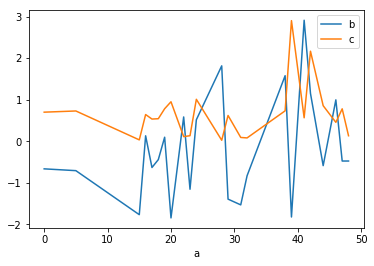

In [16]:
data_csv.plot()

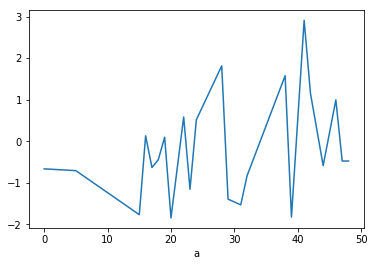

In [17]:
plt.figure()
data_csv['b'].plot()
plt.show()

## Read excel-data

In [18]:
data_excel = pd.read_excel('data/test_excel.xlsx')
data_excel.head()

,0,1,2,3,4
0,-0.666147,0.698999,-0.064125,1.016369,-1.550521
1,-0.438802,-0.150092,1.122892,1.135971,0.019231
2,-0.526358,-0.420200,-0.660466,-1.524386,-0.449969
3,0.828888,-0.248519,-0.498762,-0.451766,-1.807660
4,-0.737316,-1.713124,-0.306716,-0.352616,0.487051
